In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    print("GPU name: ", torch.cuda.get_device_name(0))

In [3]:
# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500 # 500 neurons in hidden layer
num_classes = 10 # 10 classes (0-9)
num_epochs = 5
batch_size = 100
learning_rate = 0.001

100%|██████████| 9912422/9912422 [00:04<00:00, 2364334.65it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 1907570.57it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



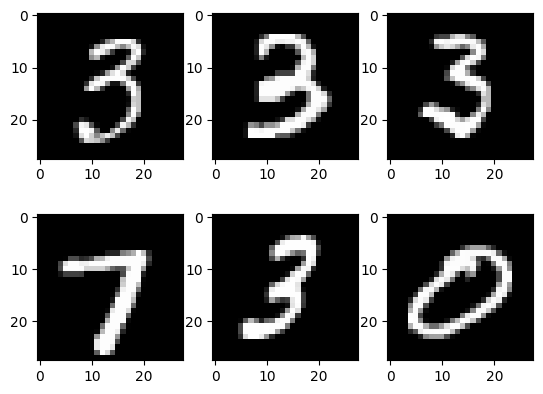

In [6]:
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                            train=False,
                                            transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                             batch_size=batch_size,
                                             shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size=batch_size,
                                            shuffle=False)

examples = iter(train_loader)
example_data, example_targets = next(examples)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [7]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [8]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/600], Loss: 0.3566
Epoch [1/5], Step [200/600], Loss: 0.3748
Epoch [1/5], Step [300/600], Loss: 0.2994
Epoch [1/5], Step [400/600], Loss: 0.1095
Epoch [1/5], Step [500/600], Loss: 0.1983
Epoch [1/5], Step [600/600], Loss: 0.1179
Epoch [2/5], Step [100/600], Loss: 0.1494
Epoch [2/5], Step [200/600], Loss: 0.1062
Epoch [2/5], Step [300/600], Loss: 0.0986
Epoch [2/5], Step [400/600], Loss: 0.1606
Epoch [2/5], Step [500/600], Loss: 0.1002
Epoch [2/5], Step [600/600], Loss: 0.0534
Epoch [3/5], Step [100/600], Loss: 0.0627
Epoch [3/5], Step [200/600], Loss: 0.0804
Epoch [3/5], Step [300/600], Loss: 0.0339
Epoch [3/5], Step [400/600], Loss: 0.1577
Epoch [3/5], Step [500/600], Loss: 0.0493
Epoch [3/5], Step [600/600], Loss: 0.0682
Epoch [4/5], Step [100/600], Loss: 0.0755
Epoch [4/5], Step [200/600], Loss: 0.0564
Epoch [4/5], Step [300/600], Loss: 0.0647
Epoch [4/5], Step [400/600], Loss: 0.0223
Epoch [4/5], Step [500/600], Loss: 0.0731
Epoch [4/5], Step [600/600], Loss:

In [12]:
# Test the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.87 %
